<a href="https://colab.research.google.com/github/Sanowarsunny/cvprs/blob/main/Cards_of_YOLO_Roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up Custom Dataset for YOLOv4

In [ ]:

%cd /content/sample
!curl -L "https://app.roboflow.com/ds/Po4jy2o8Jf?key=h85rmunwXX" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

[Errno 2] No such file or directory: '/content/sample'
/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   890  100   890    0     0   1116      0 --:--:-- --:--:-- --:--:--  1116
100 11.4M  100 11.4M    0     0  7711k      0  0:00:01  0:00:01 --:--:-- 21.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/IMG_2385_JPG.rf.50c6c248585791ee059b975a6d6b22dc.jpg  
 extracting: test/IMG_2385_JPG.rf.50c6c248585791ee059b975a6d6b22dc.txt  
 extracting: test/IMG_2390_JPG.rf.dd9ddfd0a16f1096dc32df4c11e24d2d.jpg  
 extracting: test/IMG_2390_JPG.rf.dd9ddfd0a16f1096dc32df4c11e24d2d.txt  
 extracting: test/IMG_2398_JPG.rf.acd472378af197c1c51323af375d8bf0.jpg  
 extracting: test/IMG_2398_JPG.rf.acd472378af197c1c51323af375d8bf0.txt  
 extracting: test/IMG_2398_JPG.rf.ef374fe7f9adbccedac31807d5e3cf

In [ ]:
%mkdir sample_data/
#copy image and labels
%cp train/*.jpg sample_data/
%cp valid/*.jpg sample_data/

%cp train/*.txt sample_data/
%cp valid/*.txt sample_data/

with open('sample_data/obj.dtaa', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = sample_data/train.txt\n')
  out.write('valid = sample_data/valid.txt\n')
  out.write('names = sample_data/obj.names\n')


#write train file (just the image list)
import os

with open('sample_data/train.txt', 'w') as out:
  for img in [f for f in os.listdir('train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('sample_data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir('valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

mkdir: cannot create directory ‘sample_data/’: File exists


# Write model Config for YOLO


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.regularizers import l2

lrelu = tf.keras.layers.LeakyReLU(alpha=0.1)

nb_boxes=1
grid_w=7
grid_h=7
cell_w=64
cell_h=64
img_w=grid_w*cell_w
img_h=grid_h*cell_h

model = Sequential()
    conv = convolutional(input_layer, filters_shape=(1, 1, input_channel, filter_num1), activate_type= 'leaky')
    conv = convolutional(conv       , filters_shape=(3, 3, filter_num1,   filter_num2), activate_type= 'leaky')

    input_data = convolutional(input_data, (3, 3,  3,  32), activate_type="mish")
    input_data = convolutional(input_data, (3, 3, 32,  64), downsample=True, activate_type="mish")

    route = input_data
    route = convolutional(route, (1, 1, 64, 64), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 64, 64), activate_type="mish")
    for i in range(1):
        input_data = residual_block(input_data,  64,  32, 64, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 64, 64), activate_type="mish")

    input_data = tf.concat([input_data, route], axis=-1)
    input_data = convolutional(input_data, (1, 1, 128, 64), activate_type="mish")
    input_data = convolutional(input_data, (3, 3, 64, 128), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 128, 64), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 128, 64), activate_type="mish")
    for i in range(2):
        input_data = residual_block(input_data, 64,  64, 64, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 64, 64), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 128, 128), activate_type="mish")
    input_data = convolutional(input_data, (3, 3, 128, 256), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 256, 128), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 256, 128), activate_type="mish")
    for i in range(8):
        input_data = residual_block(input_data, 128, 128, 128, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 128, 128), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 256, 256), activate_type="mish")
    route_1 = input_data
    input_data = convolutional(input_data, (3, 3, 256, 512), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 512, 256), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 512, 256), activate_type="mish")
    for i in range(8):
        input_data = residual_block(input_data, 256, 256, 256, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 256, 256), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 512, 512), activate_type="mish")
    route_2 = input_data
    input_data = convolutional(input_data, (3, 3, 512, 1024), downsample=True, activate_type="mish")
    route = input_data
    route = convolutional(route, (1, 1, 1024, 512), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 1024, 512), activate_type="mish")
    for i in range(4):
        input_data = residual_block(input_data, 512, 512, 512, activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 512, 512), activate_type="mish")
    input_data = tf.concat([input_data, route], axis=-1)

    input_data = convolutional(input_data, (1, 1, 1024, 1024), activate_type="mish")
    input_data = convolutional(input_data, (1, 1, 1024, 512))
    input_data = convolutional(input_data, (3, 3, 512, 1024))
    input_data = convolutional(input_data, (1, 1, 1024, 512))

    input_data = tf.concat([tf.nn.max_pool(input_data, ksize=13, padding='SAME', strides=1), tf.nn.max_pool(input_data, ksize=9, padding='SAME', strides=1)
                            , tf.nn.max_pool(input_data, ksize=5, padding='SAME', strides=1), input_data], axis=-1)
    input_data = convolutional(input_data, (1, 1, 2048, 512))
    input_data = convolutional(input_data, (3, 3, 512, 1024))
    input_data = convolutional(input_data, (1, 1, 1024, 512))

 

In [ ]:
model.fit(x=my_training_batch_generator,
          steps_per_epoch = int(len(X_train) // batch_size),
          epochs = 135,
          verbose = 1,
          workers= 4,
          validation_data = my_validation_batch_generator,
          validation_steps = int(len(X_val) // batch_size),
           callbacks=[
              CustomLearningRateScheduler(lr_schedule),
              mcp_save
          ])

In [ ]:
#we build config dynamically based on number of classes
#we build iteratively from base config files. This is the same file shape as cfg/yolo-obj.cfg
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_sapmle_data.labels')
max_batches = num_classes*2000
steps1 = .8 * max_batches
steps2 = .9 * max_batches
steps_str = str(steps1)+','+str(steps2)
num_filters = (num_classes + 5) * 3


from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

writing config for a custom YOLOv4 detector detecting number of classes: 6


Streaming output truncated to the last 5000 lines.
 (next mAP calculation at 11100 iterations) 
 Last accuracy mAP@0.5 = 97.62 %, best = 98.48 % 
 11051: 0.045119, 0.017150 avg loss, 0.000026 rate, 0.564785 seconds, 530448 images, 0.165646 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 11100 iterations) 
 Last accuracy mAP@0.5 = 97.62 %, best = 98.48 % 
 11052: 0.008550, 0.016290 avg loss, 0.000026 rate, 0.569683 seconds, 530496 images, 0.165478 hours left
Loaded: 0.000049 seconds

 (next mAP calculation at 11100 iterations) 
 Last accuracy mAP@0.5 = 97.62 %, best = 98.48 % 
 11053: 0.049036, 0.019565 avg loss, 0.000026 rate, 0.578547 seconds, 530544 images, 0.165324 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 11100 iterations) 
 Last accuracy mAP@0.5 = 97.62 %, best = 98.48 % 
 11054: 0.002292, 0.017837 avg loss, 0.000026 rate, 0.586960 seconds, 530592 images, 0.165193 hours left
Loaded: 0.000051 seconds

 (next mAP calculation at 11100 iterations) 


In [ ]:
#coco.names is hardcoded somewhere in the detector
%cp data/obj.names data/coco.names

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 128 -

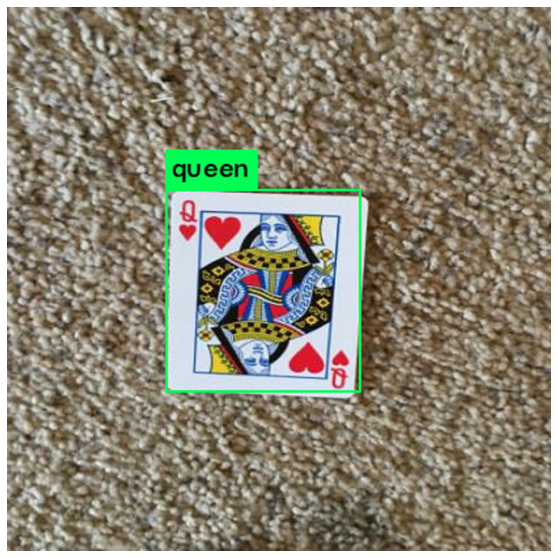

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 750, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 24, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 128 -

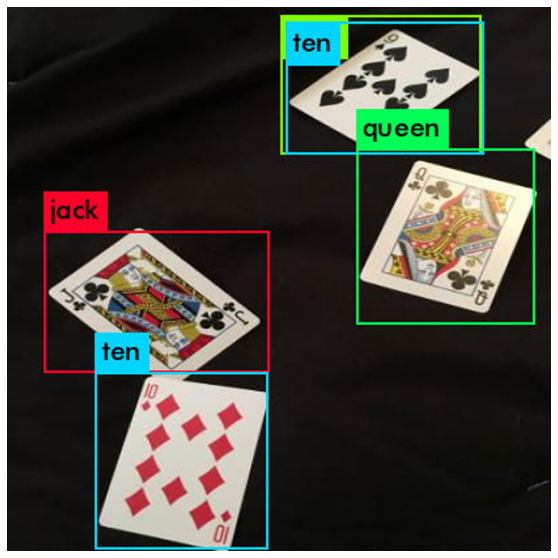

In [ ]:
#/test has images that we can test our detector on
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

#test out our detector!
imShow('sample_data/predictions.jpg')